## Laboratorio #3

Aprendizaje Profundo - CNN
Marco Ramirez - 21032
Josué Morales - 21116

In [2]:
import pickle
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
# Carga de archivos
def cargar_datos(ruta_archivo):
    with open(ruta_archivo, 'rb') as archivo:
        datos = pickle.load(archivo)
    return datos

# Cargar los tres archivos
datos_validacion = cargar_datos('./validacion.p')
datos_prueba = cargar_datos('./prueba.p')
datos_entrenamiento = cargar_datos('./entrenamiento.p')

# Extraer las características y etiquetas
X_entrenamiento = datos_entrenamiento['features']
y_entrenamiento = datos_entrenamiento['labels']

X_validacion = datos_validacion['features']
y_validacion = datos_validacion['labels']

X_prueba = datos_prueba['features']
y_prueba = datos_prueba['labels']

# Verificar las formas de los arrays
print(f"Forma de X_entrenamiento: {X_entrenamiento.shape}")
print(f"Forma de y_entrenamiento: {y_entrenamiento.shape}")
print(f"Forma de X_validacion: {X_validacion.shape}")
print(f"Forma de y_validacion: {y_validacion.shape}")
print(f"Forma de X_prueba: {X_prueba.shape}")
print(f"Forma de y_prueba: {y_prueba.shape}")

Forma de X_entrenamiento: (34799, 32, 32, 3)
Forma de y_entrenamiento: (34799,)
Forma de X_validacion: (4410, 32, 32, 3)
Forma de y_validacion: (4410,)
Forma de X_prueba: (12630, 32, 32, 3)
Forma de y_prueba: (12630,)


In [4]:
# Declaración del número de clases
clases = np.unique(y_entrenamiento)
numero_clases = len(clases)
print('Número total de clases de salida:', numero_clases)
print('Clases de salida:', clases)

Número total de clases de salida: 43
Clases de salida: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [5]:
# Normalización de los datos
X_entrenamiento = X_entrenamiento.astype('float32') / 255.0
X_validacion = X_validacion.astype('float32') / 255.0
X_prueba = X_prueba.astype('float32') / 255.0

In [6]:
# One-hot encoding
y_entrenamiento = to_categorical(y_entrenamiento)
y_validacion = to_categorical(y_validacion)
y_prueba = to_categorical(y_prueba)

In [7]:
# Creación del modelo
def crear_modelo():
    modelo = Sequential()
    modelo.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=X_entrenamiento.shape[1:]))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    modelo.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    modelo.add(Flatten())
    modelo.add(Dense(120, activation='relu'))
    modelo.add(Dense(84, activation='relu'))
    modelo.add(Dense(numero_clases, activation='softmax'))

    return modelo

In [8]:
modelo1 = crear_modelo()
tamano_lote = 256
numero_epocas = 20
modelo1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [10]:
historial = modelo1.fit(
    X_entrenamiento,
    y_entrenamiento,
    batch_size=tamano_lote,
    epochs=numero_epocas,
    verbose=1,
    validation_data=(X_validacion, y_validacion)
)

Epoch 1/20
136/136 [==============================] - 6s 45ms/step - loss: 0.8920 - accuracy: 0.7564 - val_loss: 0.9534 - val_accuracy: 0.7474
Epoch 2/20
136/136 [==============================] - 6s 43ms/step - loss: 0.5464 - accuracy: 0.8523 - val_loss: 0.8184 - val_accuracy: 0.7855
Epoch 3/20
136/136 [==============================] - 5s 40ms/step - loss: 0.3838 - accuracy: 0.8994 - val_loss: 0.6959 - val_accuracy: 0.8313
Epoch 4/20
136/136 [==============================] - 5s 40ms/step - loss: 0.2901 - accuracy: 0.9263 - val_loss: 0.6845 - val_accuracy: 0.8354
Epoch 5/20
136/136 [==============================] - 6s 41ms/step - loss: 0.2356 - accuracy: 0.9410 - val_loss: 0.6551 - val_accuracy: 0.8406
Epoch 6/20
136/136 [==============================] - 6s 41ms/step - loss: 0.1867 - accuracy: 0.9537 - val_loss: 0.6261 - val_accuracy: 0.8612
Epoch 7/20
136/136 [==============================] - 5s 40ms/step - loss: 0.1522 - accuracy: 0.9634 - val_loss: 0.6515 - val_accuracy: 0.8490

Text(0.5, 1.0, 'Curvas de Precisión')

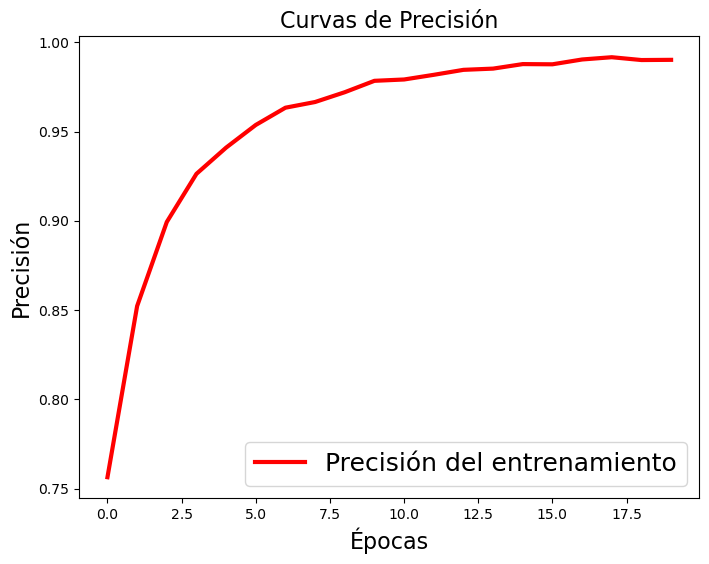

In [11]:
plt.figure(figsize=[8,6])
plt.plot(historial.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Precisión del entrenamiento'],fontsize=18)
plt.xlabel('Épocas',fontsize=16)
plt.ylabel('Precisión',fontsize=16)
plt.title('Curvas de Precisión',fontsize=16)

In [12]:
predicciones = modelo1.predict(X_prueba)

395/395 [==============================] - 1s 3ms/step


In [13]:
# Segundo modelo
modelo2 = crear_modelo()
numero_epocas2 = 30
modelo2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [14]:
historial2 = modelo2.fit(
    X_entrenamiento,
    y_entrenamiento,
    batch_size=tamano_lote,
    epochs=numero_epocas2,
    verbose=1,
    validation_data=(X_validacion, y_validacion)
)

Epoch 1/30
136/136 [==============================] - 6s 42ms/step - loss: 2.4039 - accuracy: 0.3896 - val_loss: 1.4255 - val_accuracy: 0.5998
Epoch 2/30
136/136 [==============================] - 6s 41ms/step - loss: 0.7765 - accuracy: 0.7968 - val_loss: 0.8099 - val_accuracy: 0.7891
Epoch 3/30
136/136 [==============================] - 6s 41ms/step - loss: 0.4187 - accuracy: 0.8924 - val_loss: 0.6370 - val_accuracy: 0.8363
Epoch 4/30
136/136 [==============================] - 6s 41ms/step - loss: 0.2855 - accuracy: 0.9284 - val_loss: 0.5194 - val_accuracy: 0.8662
Epoch 5/30
136/136 [==============================] - 6s 41ms/step - loss: 0.2105 - accuracy: 0.9483 - val_loss: 0.5058 - val_accuracy: 0.8755
Epoch 6/30
136/136 [==============================] - 6s 41ms/step - loss: 0.1683 - accuracy: 0.9588 - val_loss: 0.4717 - val_accuracy: 0.8837
Epoch 7/30
136/136 [==============================] - 6s 41ms/step - loss: 0.1364 - accuracy: 0.9678 - val_loss: 0.4941 - val_accuracy: 0.8832

Text(0.5, 1.0, 'Curvas de Precisión')

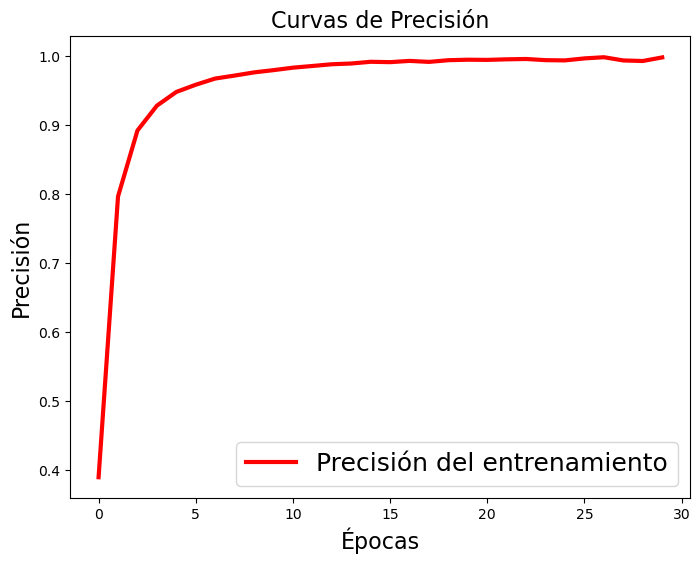

In [15]:
plt.figure(figsize=[8,6])
plt.plot(historial2.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Precisión del entrenamiento'],fontsize=18)
plt.xlabel('Épocas',fontsize=16)
plt.ylabel('Precisión',fontsize=16)
plt.title('Curvas de Precisión',fontsize=16)

In [16]:
predicciones2 = modelo2.predict(X_prueba)

# Métricas del modelo
precision_modelo2 = accuracy_score(y_prueba.argmax(axis=1), predicciones2.argmax(axis=1))
exactitud_modelo2 = precision_score(y_prueba.argmax(axis=1), predicciones2.argmax(axis=1), average='weighted')
recall_modelo2 = recall_score(y_prueba.argmax(axis=1), predicciones2.argmax(axis=1), average='weighted')
f1_modelo2 = f1_score(y_prueba.argmax(axis=1), predicciones2.argmax(axis=1), average='weighted')

print(f"Precisión del modelo: {precision_modelo2}")
print(f"Exactitud del modelo: {exactitud_modelo2}")
print(f"Recall del modelo: {recall_modelo2}")
print(f"F1 del modelo: {f1_modelo2}")

395/395 [==============================] - 1s 3ms/step
Precisión del modelo: 0.9184481393507522
Exactitud del modelo: 0.9231449324673955
Recall del modelo: 0.9184481393507522
F1 del modelo: 0.9187250590939312


In [17]:
# Tercer modelo
def crear_modelo_mejorado():
    modelo = Sequential()

    # Primera capa convolucional
    modelo.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_entrenamiento.shape[1:]))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional
    modelo.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Tercera capa convolucional (opcional)
    modelo.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capas fully connected
    modelo.add(Flatten())
    modelo.add(Dense(120, activation='relu', kernel_regularizer=l2(0.01)))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(84, activation='relu', kernel_regularizer=l2(0.01)))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(numero_clases, activation='softmax'))

    return modelo

In [18]:
modelo3 = crear_modelo_mejorado()
modelo3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

historial3 = modelo3.fit(
    X_entrenamiento,
    y_entrenamiento,
    batch_size=tamano_lote,
    epochs=numero_epocas,
    verbose=1,
    validation_data=(X_validacion, y_validacion)
)

Epoch 1/20
136/136 [==============================] - 15s 112ms/step - loss: 4.1242 - accuracy: 0.3148 - val_loss: 4.5411 - val_accuracy: 0.1086
Epoch 2/20
136/136 [==============================] - 15s 112ms/step - loss: 1.6085 - accuracy: 0.7444 - val_loss: 3.5175 - val_accuracy: 0.2331
Epoch 3/20
136/136 [==============================] - 15s 110ms/step - loss: 0.8246 - accuracy: 0.8948 - val_loss: 1.5100 - val_accuracy: 0.7041
Epoch 4/20
136/136 [==============================] - 14s 105ms/step - loss: 0.5411 - accuracy: 0.9430 - val_loss: 0.5642 - val_accuracy: 0.9342
Epoch 5/20
136/136 [==============================] - 14s 106ms/step - loss: 0.4134 - accuracy: 0.9624 - val_loss: 0.3905 - val_accuracy: 0.9644
Epoch 6/20
136/136 [==============================] - 14s 105ms/step - loss: 0.3423 - accuracy: 0.9718 - val_loss: 0.3148 - val_accuracy: 0.9732
Epoch 7/20
136/136 [==============================] - 14s 106ms/step - loss: 0.2985 - accuracy: 0.9782 - val_loss: 0.3112 - val_ac

Text(0.5, 1.0, 'Curvas de Precisión')

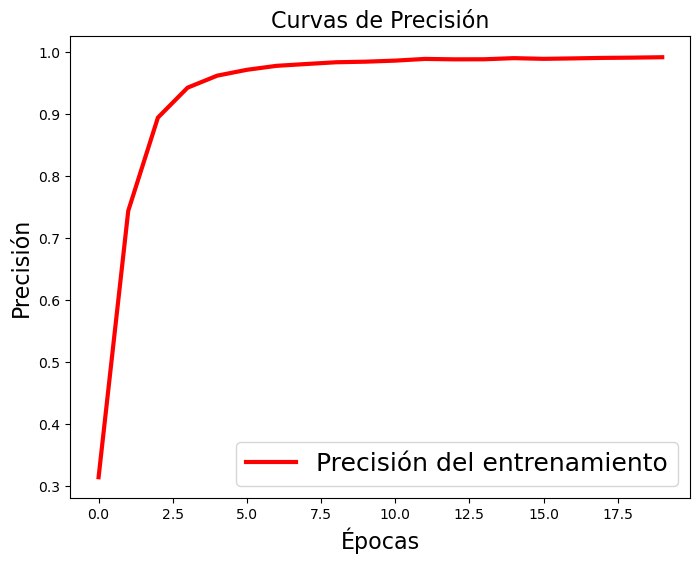

In [19]:
plt.figure(figsize=[8,6])
plt.plot(historial3.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Precisión del entrenamiento'],fontsize=18)
plt.xlabel('Épocas',fontsize=16)
plt.ylabel('Precisión',fontsize=16)
plt.title('Curvas de Precisión',fontsize=16)


In [20]:
predicciones3 = modelo3.predict(X_prueba)

precision_modelo3 = accuracy_score(y_prueba.argmax(axis=1), predicciones3.argmax(axis=1))
exactitud_modelo3 = precision_score(y_prueba.argmax(axis=1), predicciones3.argmax(axis=1), average='weighted')
recall_modelo3 = recall_score(y_prueba.argmax(axis=1), predicciones3.argmax(axis=1), average='weighted')
f1_modelo3 = f1_score(y_prueba.argmax(axis=1), predicciones3.argmax(axis=1), average='weighted')

print(f"Precisión del modelo mejorado: {precision_modelo3}")
print(f"Exactitud del modelo mejorado: {exactitud_modelo3}")
print(f"Recall del modelo mejorado: {recall_modelo3}")
print(f"F1 del modelo mejorado: {f1_modelo3}")

395/395 [==============================] - 3s 6ms/step
Precisión del modelo mejorado: 0.963895486935867
Exactitud del modelo mejorado: 0.9659908983566421
Recall del modelo mejorado: 0.963895486935867
F1 del modelo mejorado: 0.9634532672431997
